# Sentiment Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#The required python packages are as follows
import json 
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Loading and extracting Data

In [3]:
df = pd.read_csv('test_data.csv')

In [4]:
df.head()

,t,l
0,I am still waiting on my card?,11
1,What can I do if my card still hasn't arrived ...,11
2,I have been waiting over a week. Is the card s...,11
3,Can I track my card while it is in the process...,11
4,"How do I know if I will get my card, or if it ...",11


In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rim/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df['t']= df['t'].astype(str)

# # Applying Model, Variable Creation
df['Polarity Score'] = df['t'].apply(lambda x: SIA.polarity_scores(x)['compound'])
df['Neutral Score'] = df['t'].apply(lambda x: SIA.polarity_scores(x)['neu'])
df['Negative Score'] = df['t'].apply(lambda x: SIA.polarity_scores(x)['neg'])
df['Positive Score'] = df['t'].apply(lambda x: SIA.polarity_scores(x)['pos'])

In [8]:
print(SIA.polarity_scores('HAPPY'))
print(SIA.polarity_scores('Not Happy'))
print(SIA.polarity_scores('I like it'))
print(SIA.polarity_scores('I love it'))

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
{'neg': 0.75, 'neu': 0.25, 'pos': 0.0, 'compound': -0.4585}
{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}


In [9]:
df.sort_values(by='Polarity Score')

,t,l,Polarity Score,Neutral Score,Negative Score,Positive Score
7511,"This morning, I tried to send money to my frie...",35,-0.9517,0.626,0.334,0.040
2111,I've made a horrible mistake! I transferred m...,8,-0.9380,0.443,0.493,0.064
8877,My identity has been stolen. I still have my p...,20,-0.9091,0.631,0.369,0.000
3296,"Hello, I have recharged topup but account is ...",61,-0.8777,0.605,0.395,0.000
2197,Please can you block the transaction I just se...,8,-0.8625,0.694,0.263,0.042
...,...,...,...,...,...,...
5800,I keep checking my statements but nothing show...,51,0.8674,0.782,0.000,0.218
6804,I've got a problem - I bought something with m...,53,0.8735,0.773,0.033,0.194
2974,"I would like to top up via credit card, which ...",54,0.8807,0.425,0.000,0.575
5531,"Hello, i'd like to inform you of an issue i'm ...",52,0.8899,0.774,0.000,0.226


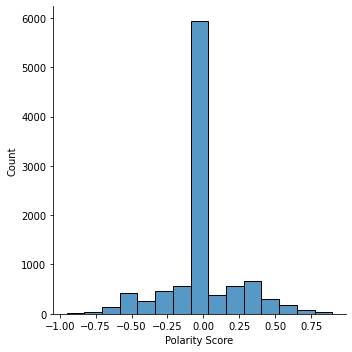

In [10]:
sns.displot(data=df,x='Polarity Score')

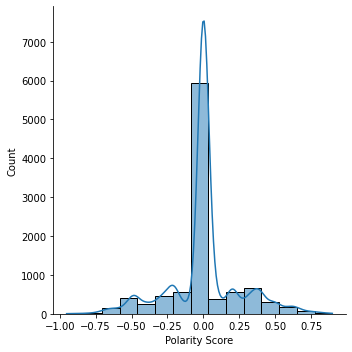

In [11]:
sns.displot(data=df,x='Polarity Score', kde = True)

### Visualisation des segments des clients par niveaux:

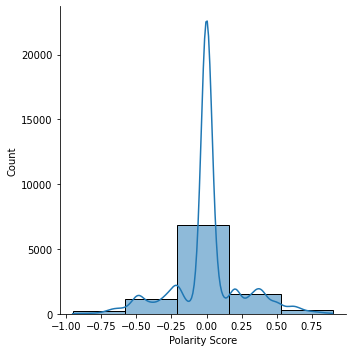

In [12]:
def plot_sentiment_levels(n):
    sns.displot(data=df,x='Polarity Score', kde = True, bins=n)
plot_sentiment_levels(5)

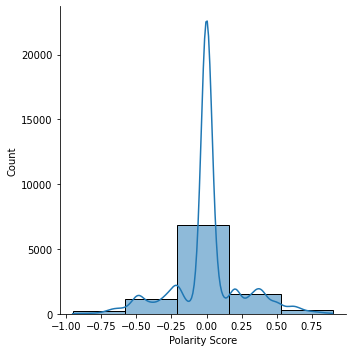

In [13]:
plot_sentiment_levels(5)

# Topic Modeling 

In [14]:
# !pip3 install pyLDAvis
# # !pip3 install spacy
# !python3 -m spacy download en_core_web_md

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

/home/rim/.local/lib/python3.8/site-packages/gensim/matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


In [16]:
# df_ = df[['t', 'responses']]
df_ = df[['t']]
df_

,t
0,I am still waiting on my card?
1,What can I do if my card still hasn't arrived ...
2,I have been waiting over a week. Is the card s...
3,Can I track my card while it is in the process...
4,"How do I know if I will get my card, or if it ..."
...,...
9998,You provide support in what countries?
9999,What countries are you supporting?
10000,What countries are getting support?
10001,Are cards available in the EU?


## Remove punctuation/lower casing 

In [17]:
# Load the regular expression library
import re
# Remove punctuation
df_['t'] = df_['t'].map(lambda x: re.sub('[,\.!?]', '', x))
# lowercase
df_['t'] = df_['t'].map(lambda x: x.lower())
# Print out the first rows of papers
df_['t'].head()

<>:4: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \.
/tmp/ipykernel_7233/1653443785.py:4: DeprecationWarning: invalid escape sequence \.
  df_['t'] = df_['t'].map(lambda x: re.sub('[,\.!?]', '', x))


0                        i am still waiting on my card
1    what can i do if my card still hasn't arrived ...
2    i have been waiting over a week is the card st...
3    can i track my card while it is in the process...
4    how do i know if i will get my card or if it i...
Name: t, dtype: object

In [18]:
# !pip3 install wordcloud

/home/rim/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/rim/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/rim/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/home/rim/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:513: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/home/rim/.local/lib/python3.8/site-pac

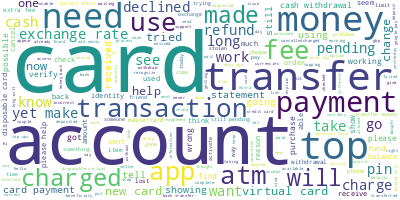

In [19]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_['t'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Prepare data for LDA Analysis
    Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [20]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /home/rim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [22]:
data = df_.t.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
data_words[0]

['still', 'waiting', 'card']

In [23]:
data_words[2:6]

[['waiting', 'week', 'card', 'still', 'coming'],
 ['track', 'card', 'process', 'delivery'],
 ['know', 'get', 'card', 'lost'],
 ['send', 'new', 'card']]

In [24]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])
# View
print(corpus[2])
print(corpus[3])
print(corpus[4])
print(corpus[5])

[(0, 1), (1, 1), (2, 1)]
[(0, 1), (1, 1), (2, 1), (5, 1), (6, 1)]
[(0, 1), (7, 1), (8, 1), (9, 1)]
[(0, 1), (10, 1), (11, 1), (12, 1)]
[(0, 1), (13, 1), (14, 1)]


## LDA model training


     https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158

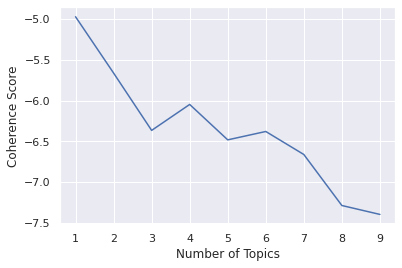

In [25]:
# Coherence score using C_umass:
topics = []
score = []
for i in range(1,10,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=id2word, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

# Coh

In [26]:
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.043*"card" + 0.034*"payment" + 0.021*"pending" + 0.020*"money" + '
  '0.019*"transfer" + 0.016*"still" + 0.015*"please" + 0.014*"account" + '
  '0.013*"exchange" + 0.013*"need"'),
 (1,
  '0.072*"card" + 0.035*"get" + 0.030*"top" + 0.023*"money" + 0.018*"cash" + '
  '0.015*"transfer" + 0.014*"need" + 0.013*"account" + 0.012*"new" + '
  '0.012*"exchange"'),
 (2,
  '0.059*"account" + 0.036*"card" + 0.036*"transfer" + 0.028*"money" + '
  '0.020*"top" + 0.014*"make" + 0.013*"cash" + 0.012*"would" + 0.011*"pin" + '
  '0.011*"app"'),
 (3,
  '0.035*"card" + 0.026*"account" + 0.019*"charged" + 0.018*"extra" + '
  '0.016*"transfer" + 0.014*"need" + 0.014*"please" + 0.013*"money" + '
  '0.012*"top" + 0.011*"got"')]


In [27]:
# import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import os
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

In [28]:
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk

In [29]:
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

In [30]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.008788 -0.037133       1        1  29.592265
0     -0.057366 -0.013858       2        1  27.215180
2      0.064606 -0.019034       3        1  21.960898
3      0.001549  0.070025       4        1  21.231657, topic_info=        Term         Freq        Total Category  logprob  loglift
146  account  1351.000000  1351.000000  Default  30.0000  30.0000
10       get   690.000000   690.000000  Default  29.0000  29.0000
166  payment   722.000000   722.000000  Default  28.0000  28.0000
243    extra   272.000000   272.000000  Default  27.0000  27.0000
370  pending   420.000000   420.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
632      top   132.963713   958.704913   Topic4  -4.4048  -0.4258
312     made    82.922727   356.294306   Topic4  -4.8770   0.0918
10       get   102.392746   690.621080   Topic4  -4.6661  -0.3591
104      app    87.496092   441.559921   Topic4  -4.8233  -0.0690
144    cards    75.843141   276.517833   Topic4  -4.9662   0.2561

[336 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
146       1  0.150889   account
146       2  0.143493   account
146       3  0.495567   account
146       4  0.210061   account
2004      3  0.653557  addition
...     ...       ...       ...
245       4  0.160831     wrong
33        1  0.266012       yet
33        2  0.333508       yet
33        3  0.305715       yet
33        4  0.095288       yet

[690 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

## LSA


In [31]:
from gensim.models import LsiModel

In [32]:
lsamodel = LsiModel(corpus= corpus, num_topics=num_topics, id2word = id2word)  # train model
pprint(lsamodel.print_topics())

/home/rim/.local/lib/python3.8/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


[(0,
  '0.818*"card" + 0.208*"account" + 0.192*"money" + 0.171*"get" + '
  '0.148*"payment" + 0.120*"need" + 0.118*"transfer" + 0.112*"please" + '
  '0.109*"top" + 0.092*"new"'),
 (1,
  '-0.556*"account" + 0.458*"card" + -0.413*"money" + -0.390*"transfer" + '
  '-0.105*"please" + -0.092*"long" + -0.091*"cash" + -0.089*"made" + '
  '-0.081*"take" + -0.078*"need"'),
 (2,
  '0.536*"transfer" + -0.410*"cash" + -0.282*"atm" + -0.276*"exchange" + '
  '-0.272*"money" + -0.251*"get" + -0.212*"rate" + -0.179*"charged" + '
  '-0.139*"withdrawal" + -0.126*"wrong"'),
 (3,
  '0.545*"account" + -0.437*"transfer" + 0.430*"top" + -0.415*"money" + '
  '0.210*"payment" + -0.167*"get" + -0.089*"long" + -0.085*"atm" + '
  '-0.080*"take" + -0.076*"charged"')]


/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alterna